In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Desafio 1 - Carregar os Dados
dados=pd.read_csv('arquivo_vendas.csv',delimiter=';')
print(dados.head(5))



   Cliende ID  Idade Item Comprado Categoria  Valor Compra  \
0           1     55         Blusa    Roupas            53   
1           2     19        Blusão    Roupas            64   
2           3     50   Calça jeans    Roupas            73   
3           4     21      Sandália  Calçados            90   
4           5     45         Blusa    Roupas            49   

                Cidade   Método Pagamento  
0  Rio Grande do Norte  Cartão de crédito  
1              Roraima           Dinheiro  
2                Piauí  Cartão de crédito  
3                Ceará                Pix  
4             Amazonas                Pix  


In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dados=pd.read_csv('arquivo_vendas.csv',delimiter=';')


#Desafio 2 - Análise Exploratória de Dados:

print(f'\nResumo Estatístico:\n{dados.describe()}')

media_por_idade = dados.groupby('Idade').mean()
print(f'\nMédia por Idade:\n{media_por_idade}')

media_por_valor_compra = dados.groupby('Valor Compra').mean()
media_arrendodada = np.round(media_por_valor_compra)
print(f'\nMédia por Valor:\n{media_arrendodada}')

mediana_idade=dados['Idade'].median()
print(f'\nMediana de Idade:\n{mediana_idade}')

desvio_padrao_valor_compra=dados['Valor Compra'].std().round()
print(f'\nDesvio Padrão:\nd{desvio_padrao_valor_compra}')

print("\nDados faltantes por colunas:\n",dados.isnull().sum())



Resumo Estatístico:
        Cliende ID        Idade  Valor Compra
count  3900.000000  3900.000000   3900.000000
mean   1950.500000    44.068462     59.764359
std    1125.977353    15.207589     23.685392
min       1.000000    18.000000     20.000000
25%     975.750000    31.000000     39.000000
50%    1950.500000    44.000000     60.000000
75%    2925.250000    57.000000     81.000000
max    3900.000000    70.000000    100.000000

Média por Idade:
        Cliende ID  Valor Compra
Idade                           
18     1995.478261     59.985507
19     1955.765432     61.000000
20     1752.564516     55.225806
21     1830.159420     64.101449
22     2118.757576     60.772727
23     2089.028169     56.746479
24     1904.323529     63.102941
25     1784.811765     63.200000
26     2113.347826     61.043478
27     1962.867470     53.734940
28     1962.455696     64.607595
29     1858.802632     59.197368
30     1922.366197     61.605634
31     2065.886076     61.569620
32     1851.719512 

<ipython-input-218-df28b1de6dc4>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_por_idade = dados.groupby('Idade').mean()
<ipython-input-218-df28b1de6dc4>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_por_valor_compra = dados.groupby('Valor Compra').mean()


In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dados=pd.read_csv('arquivo_vendas.csv',delimiter=';')

#Desafio 3 - Manipulação e Limpeza dos Dados:

def faixa_etaria(idade):
    if idade < 30:
        return 'Jovem'
    elif idade >= 30 and idade < 65:
        return 'Adulto'
    else:
      return 'Idoso'

dados['Faixa Etária'] = dados['Idade'].apply(faixa_etaria)
print(dados.head())

   Cliende ID  Idade Item Comprado Categoria  Valor Compra  \
0           1     55         Blusa    Roupas            53   
1           2     19        Blusão    Roupas            64   
2           3     50   Calça jeans    Roupas            73   
3           4     21      Sandália  Calçados            90   
4           5     45         Blusa    Roupas            49   

                Cidade   Método Pagamento Faixa Etária  
0  Rio Grande do Norte  Cartão de crédito       Adulto  
1              Roraima           Dinheiro        Jovem  
2                Piauí  Cartão de crédito       Adulto  
3                Ceará                Pix        Jovem  
4             Amazonas                Pix       Adulto  


In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dados=pd.read_csv('arquivo_vendas.csv',delimiter=';')

def faixa_etaria(idade):
    if idade < 30:
        return 'Jovem'
    elif idade >= 30 and idade < 65:
        return 'Adulto'
    else:
      return 'Idoso'

dados['Faixa Etária'] = dados['Idade'].apply(faixa_etaria)

#Desafio 4 - Análise Detalhada:
itens_mais_vendidos = dados['Item Comprado'].value_counts()
categorias_populares = dados['Categoria'].value_counts()
print(f'\nContagem dos itens mais vendidos: \n{itens_mais_vendidos}')
print(f'\nCategorias mais populares:\n{categorias_populares}')

media_compra_por_idade = dados.groupby('Idade')['Valor Compra'].mean().reset_index().round(2)
print(f'\nValor médio por Idade\n{media_compra_por_idade}')

media_compra_por_cidade = dados.groupby('Cidade')['Valor Compra'].mean().reset_index().round(2)
print(f'\nValor médio por Idade\n{media_compra_por_cidade}')

preferencia_pagamento_idade = dados.groupby(['Método Pagamento','Faixa Etária']).size().unstack().fillna(0)
print(preferencia_pagamento_idade)



Contagem dos itens mais vendidos: 
Camiseta             316
Blusa                171
Jóia                 171
Calça comprida       171
Vestido              166
Blusão               164
Jaqueta              163
Cinto                161
Óculos de sol        161
Casaco               161
Sandália             160
Meia                 159
Saia                 158
Shorts               157
Lenço                157
Chapéu               154
Bolsa                153
Moletom com capuz    151
Sapato               150
Tênis                145
Bota                 144
Mochila              143
Luva                 140
Calça jeans          124
Name: Item Comprado, dtype: int64

Categorias mais populares:
Roupas        1737
Acessórios    1240
Calçados       599
Agasalhos      324
Name: Categoria, dtype: int64

Valor médio por Idade
    Idade  Valor Compra
0      18         59.99
1      19         61.00
2      20         55.23
3      21         64.10
4      22         60.77
5      23         56.75
6    

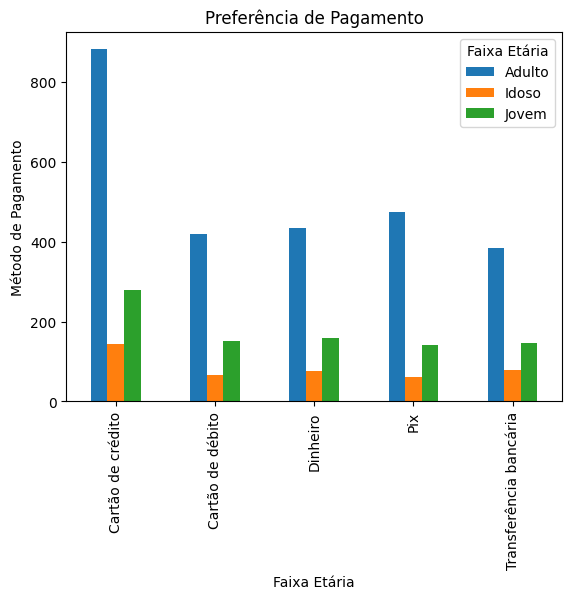

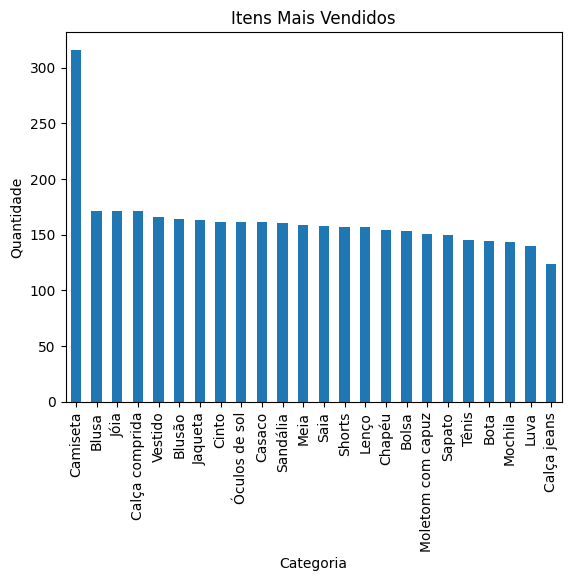

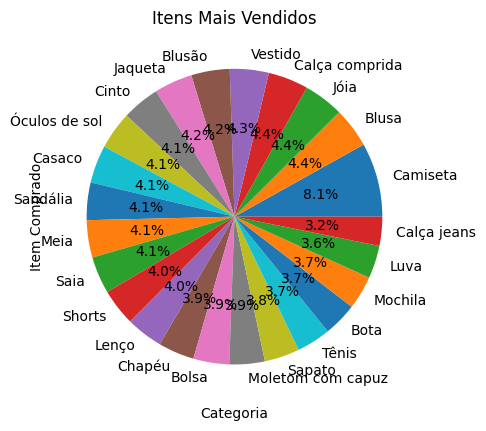

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dados=pd.read_csv('arquivo_vendas.csv',delimiter=';')

#Desafio 5 - Visualização de Dados:

preferencia_pagamento_idade.plot(kind='bar')
plt.title('Preferência de Pagamento')
plt.ylabel('Método de Pagamento')
plt.xlabel('Faixa Etária')
plt.show()

itens_mais_vendidos.plot(kind='bar')
plt.title('Itens Mais Vendidos')
plt.ylabel('Quantidade')
plt.xlabel('Categoria')
plt.show()

itens_mais_vendidos.plot(kind='pie', autopct='%1.1f%%')
plt.title('Itens Mais Vendidos')
plt.xlabel('Categoria')
plt.show()


In [ ]:
#Desafio 6 Insights e Conclusões:

# Insights:

# 1. Produtos Populares:
#    - Camisetas são os itens mais vendidos, enquanto calças jeans têm baixo desempenho.
#      A categoria "Agasalhos" é menos popular. Isso sugere uma oportunidade de promoção
#      ou marketing direcionado para impulsionar as vendas desses itens menos populares.

# 2. Perfil Demográfico de Compradores:
#    - A faixa etária de 53 e 49 anos é a que mais compra, seguida pela faixa de 44 anos.
#      Por outro lado, as faixas etárias de 48, 42 e 27 anos mostram menor atividade de compra.
#      A empresa pode adaptar suas estratégias de marketing para atender melhor às preferências
#      e necessidades das faixas etárias menos ativas.

# 3. Variação Geográfica nas Vendas:
#    - Sergipe, São Paulo e Tocantins são os estados com menor volume de vendas, enquanto Ceará,
#      Amapá e Alagoas têm desempenho superior. A empresa pode considerar estratégias regionais
#      específicas, como campanhas promocionais direcionadas ou parcerias locais, para impulsionar
#      as vendas nos estados com menor desempenho.

# 4. Preferências de Método de Pagamento:
#    - Cartão de crédito é o método de pagamento mais popular em todas as faixas etárias.
#      A empresa pode oferecer promoções ou benefícios específicos para clientes que utilizam
#      métodos de pagamento menos populares, incentivando a diversificação dos métodos de pagamento
#      e melhorando a experiência do cliente.

# Sugestões de Ações:

# 1. Campanhas Promocionais Específicas:
#    - Lançar campanhas promocionais para impulsionar as vendas de produtos menos populares,
#      como calças jeans e agasalhos. Isso pode incluir descontos especiais, pacotes promocionais
#      ou brindes.

# 2. Segmentação de Marketing por Faixa Etária:
#    - Personalizar estratégias de marketing para atender melhor às diferentes faixas etárias.
#      Isso pode envolver a criação de conteúdo específico, parcerias com influenciadores
#      relevantes para cada faixa etária e a oferta de produtos alinhados aos interesses de cada grupo.

# 3. Estratégias Regionais:
#    - Desenvolver estratégias de marketing específicas para estados com desempenho inferior,
#      considerando as características demográficas e culturais locais. Parcerias com empresas locais
#      e promoções adaptadas à região podem ser eficazes.

# 4. Incentivos para Diversificação de Pagamentos:
#    - Introduzir promoções ou descontos exclusivos para clientes que utilizam métodos de pagamento
#      menos populares, incentivando a diversificação e oferecendo uma experiência de compra mais flexível.
